In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
shillong_meteo = pd.read_csv('/kaggle/input/meghalaya-aqi/Meghalaya/Metrological Data/Shillong.csv', delimiter=',')
shillong_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,7.0,92,0.0,850.7,3.1,5.2,225,164
1,2024-01-01T01:00,7.8,91,0.0,851.9,2.5,5.6,225,153
2,2024-01-01T02:00,10.1,90,0.0,853.6,4.9,6.6,216,158
3,2024-01-01T03:00,13.4,73,0.0,855.8,4.2,6.6,160,158
4,2024-01-01T04:00,14.7,66,0.0,856.4,4.1,5.1,135,141
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,8.9,99,0.0,851.3,1.5,3.0,234,346
8780,2024-12-31T20:00,8.0,100,0.0,850.4,2.6,4.7,245,344
8781,2024-12-31T21:00,7.2,100,0.0,849.7,4.3,7.2,253,342
8782,2024-12-31T22:00,7.3,100,0.0,849.5,3.3,6.8,248,358


In [3]:
shillong_pollutants = pd.read_csv('/kaggle/input/meghalaya-aqi/Meghalaya/Polluants/Shillong.csv', delimiter= ',')
shillong_pollutants['Timestamp'] = shillong_meteo['time']
shillong_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
shillong_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,66.61,NaN,21.62,13.22,43.48,10.62,19.20,1.27,48.08,...,NaN,7.88,87.30,3.14,245.41,0.02,0.02,8.4,858.39,NaN
1,2024-01-01T01:00,51.44,NaN,26.10,11.87,48.72,10.07,18.30,1.24,50.46,...,NaN,7.34,90.32,3.22,246.97,0.00,0.00,8.4,858.04,NaN
2,2024-01-01T02:00,44.20,NaN,25.97,10.92,32.47,9.54,18.07,0.72,51.91,...,NaN,6.94,92.04,3.20,252.72,0.00,0.00,8.4,857.76,NaN
3,2024-01-01T03:00,37.20,NaN,0.51,4.82,2.38,4.17,14.45,0.08,53.02,...,NaN,NaN,91.12,7.00,336.20,0.00,0.00,8.4,NaN,NaN
4,2024-01-01T04:00,19.50,NaN,15.90,8.03,16.33,8.41,16.84,0.34,51.92,...,NaN,6.41,92.84,3.60,241.24,0.00,0.00,8.4,858.14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
8780,2024-12-31T20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
8781,2024-12-31T21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
8782,2024-12-31T22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN


In [4]:
shillong = pd.merge(shillong_meteo.iloc[:, :], shillong_pollutants.iloc[:, 0:3], on='time')
shillong

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,7.0,92,0.0,850.7,3.1,5.2,225,164,66.61,NaN
1,2024-01-01T01:00,7.8,91,0.0,851.9,2.5,5.6,225,153,51.44,NaN
2,2024-01-01T02:00,10.1,90,0.0,853.6,4.9,6.6,216,158,44.20,NaN
3,2024-01-01T03:00,13.4,73,0.0,855.8,4.2,6.6,160,158,37.20,NaN
4,2024-01-01T04:00,14.7,66,0.0,856.4,4.1,5.1,135,141,19.50,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,8.9,99,0.0,851.3,1.5,3.0,234,346,NaN,NaN
8780,2024-12-31T20:00,8.0,100,0.0,850.4,2.6,4.7,245,344,NaN,NaN
8781,2024-12-31T21:00,7.2,100,0.0,849.7,4.3,7.2,253,342,NaN,NaN
8782,2024-12-31T22:00,7.3,100,0.0,849.5,3.3,6.8,248,358,NaN,NaN


In [5]:
shillong['city'] = 'Shillong'
shillong

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,7.0,92,0.0,850.7,3.1,5.2,225,164,66.61,NaN,Shillong
1,2024-01-01T01:00,7.8,91,0.0,851.9,2.5,5.6,225,153,51.44,NaN,Shillong
2,2024-01-01T02:00,10.1,90,0.0,853.6,4.9,6.6,216,158,44.20,NaN,Shillong
3,2024-01-01T03:00,13.4,73,0.0,855.8,4.2,6.6,160,158,37.20,NaN,Shillong
4,2024-01-01T04:00,14.7,66,0.0,856.4,4.1,5.1,135,141,19.50,NaN,Shillong
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,8.9,99,0.0,851.3,1.5,3.0,234,346,NaN,NaN,Shillong
8780,2024-12-31T20:00,8.0,100,0.0,850.4,2.6,4.7,245,344,NaN,NaN,Shillong
8781,2024-12-31T21:00,7.2,100,0.0,849.7,4.3,7.2,253,342,NaN,NaN,Shillong
8782,2024-12-31T22:00,7.3,100,0.0,849.5,3.3,6.8,248,358,NaN,NaN,Shillong


In [6]:
shillong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             5665 non-null   float64
 10  PM10 (µg/m³)              4889 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [7]:
shillong = shillong.interpolate()
shillong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8724 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [8]:
for column in shillong.columns:
    shillong[column].fillna(shillong[column].mode()[0], inplace=True)

shillong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [9]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    shillong[delay1_col] = shillong[col].shift(1)
    delay2_col = col + "_delay2"
    shillong[delay2_col] = shillong[col].shift(2)
    shillong.loc[0, delay1_col] = shillong[col].iloc[-1]
    shillong.loc[1, delay2_col] = shillong[col].iloc[-1]
    shillong.loc[0, delay2_col] = shillong[col].iloc[-2]

shillong

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,7.0,92,0.0,850.7,3.1,5.2,225,164,66.61,20.05,Shillong,19.29,19.29,20.05,20.05
1,2024-01-01T01:00,7.8,91,0.0,851.9,2.5,5.6,225,153,51.44,20.05,Shillong,66.61,19.29,20.05,20.05
2,2024-01-01T02:00,10.1,90,0.0,853.6,4.9,6.6,216,158,44.20,20.05,Shillong,51.44,66.61,20.05,20.05
3,2024-01-01T03:00,13.4,73,0.0,855.8,4.2,6.6,160,158,37.20,20.05,Shillong,44.20,51.44,20.05,20.05
4,2024-01-01T04:00,14.7,66,0.0,856.4,4.1,5.1,135,141,19.50,20.05,Shillong,37.20,44.20,20.05,20.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,8.9,99,0.0,851.3,1.5,3.0,234,346,19.29,20.05,Shillong,19.29,19.29,20.05,20.05
8780,2024-12-31T20:00,8.0,100,0.0,850.4,2.6,4.7,245,344,19.29,20.05,Shillong,19.29,19.29,20.05,20.05
8781,2024-12-31T21:00,7.2,100,0.0,849.7,4.3,7.2,253,342,19.29,20.05,Shillong,19.29,19.29,20.05,20.05
8782,2024-12-31T22:00,7.3,100,0.0,849.5,3.3,6.8,248,358,19.29,20.05,Shillong,19.29,19.29,20.05,20.05


In [10]:
meghalaya_data = shillong
meghalaya_data

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,7.0,92,0.0,850.7,3.1,5.2,225,164,66.61,20.05,Shillong,19.29,19.29,20.05,20.05
1,2024-01-01T01:00,7.8,91,0.0,851.9,2.5,5.6,225,153,51.44,20.05,Shillong,66.61,19.29,20.05,20.05
2,2024-01-01T02:00,10.1,90,0.0,853.6,4.9,6.6,216,158,44.20,20.05,Shillong,51.44,66.61,20.05,20.05
3,2024-01-01T03:00,13.4,73,0.0,855.8,4.2,6.6,160,158,37.20,20.05,Shillong,44.20,51.44,20.05,20.05
4,2024-01-01T04:00,14.7,66,0.0,856.4,4.1,5.1,135,141,19.50,20.05,Shillong,37.20,44.20,20.05,20.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,8.9,99,0.0,851.3,1.5,3.0,234,346,19.29,20.05,Shillong,19.29,19.29,20.05,20.05
8780,2024-12-31T20:00,8.0,100,0.0,850.4,2.6,4.7,245,344,19.29,20.05,Shillong,19.29,19.29,20.05,20.05
8781,2024-12-31T21:00,7.2,100,0.0,849.7,4.3,7.2,253,342,19.29,20.05,Shillong,19.29,19.29,20.05,20.05
8782,2024-12-31T22:00,7.3,100,0.0,849.5,3.3,6.8,248,358,19.29,20.05,Shillong,19.29,19.29,20.05,20.05


In [11]:
meghalaya_data['city'] = meghalaya_data['city'].astype('category')

In [12]:
input_cols, target_cols = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)',
       'surface_pressure (hPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'city', 'PM2.5 (µg/m³)_delay1', 'PM2.5 (µg/m³)_delay2', 'PM10 (µg/m³)_delay1',
       'PM10 (µg/m³)_delay2'], ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']

In [13]:
X, y = meghalaya_data[input_cols], meghalaya_data[target_cols]

In [14]:
from xgboost import XGBRegressor

In [15]:
model = XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=50,
    learning_rate=0.1,
    min_child_weight=5,
    enable_categorical=True,
)

In [16]:
model.fit(X, y['PM2.5 (µg/m³)'], verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [17]:
pred_check = model.predict(X)

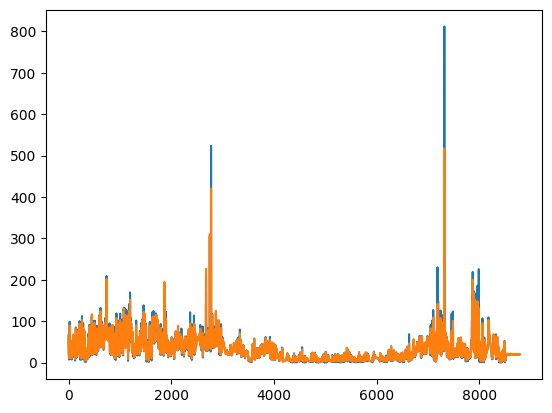

In [18]:
plt.plot(y['PM2.5 (µg/m³)'])
plt.plot(pred_check)
plt.show()

In [19]:
from sklearn.metrics import r2_score

r2 = r2_score(y['PM2.5 (µg/m³)'], pred_check)
print("R² score:", r2)

R² score: 0.9067621735980351


In [20]:
import joblib
joblib.dump(model, 'Meghalaya_PM2.5_µgm³.pkl')

['Meghalaya_PM2.5_µgm³.pkl']

In [21]:
model.fit(X, y['PM10 (µg/m³)'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
pred_check2 = model.predict(X)

In [23]:
r2 = r2_score(y['PM10 (µg/m³)'], pred_check2)
print("R² score:", r2)

R² score: 0.9021015147488223


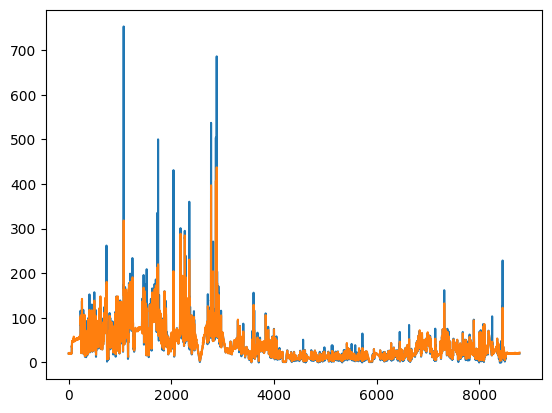

In [24]:
plt.plot(y['PM10 (µg/m³)'])
plt.plot(pred_check2)
plt.show()

In [25]:
joblib.dump(model, 'Meghalaya_PM10_µgm³.pkl')

['Meghalaya_PM10_µgm³.pkl']